### Object Detection in the Autonomous Driving Scenario

#### Description
Object Detection in the Autonomous Driving Scenario is a project intended to explore state of the art architectures for real-time multi-object detection for autonomous vehicle detection modules.

#### Team Members
- Anwesan Pal (PID : email.ucsd.edu)
- David Paz-Ruiz (A12871018 : dpazruiz@ucsd.edu)
- Harshini Rajachander (PID: email.ucsd.edu)

#### Code Base: [Repository](https://github.com/AftermathK/ece285-final-project)

### YOLO3

In [14]:
import os
import sys
import time
import cv2
import matplotlib.pyplot as plt
from yolo3_demo.utils import *
from yolo3_demo.darknet import Darknet
from PIL import Image, ImageDraw



def detect_one(cfgfile, weightfile, img):

    m = Darknet(cfgfile)

    m.print_network()
    m.load_weights(weightfile)
    print('Loading weights from %s... Done!' % (weightfile))

    num_classes = 80
    if num_classes == 20:
        namesfile = 'yolo3/data/voc.names'
    elif num_classes == 80:
        namesfile = 'yolo3/data/coco.names'
    else:
        namesfile = 'yolo3/data/names'

    use_cuda = 0
    if use_cuda:
        m.cuda()
       
    sized = img.resize((m.width, m.height))

    for i in range(2):
        t_start = time.time()
        boxes = do_detect(m, sized, 0.5, 0.4, use_cuda)
        t_finish = time.time()


    total_time = t_finish-t_start
    class_names = load_class_names(namesfile)
    print(total_time)
    return plot_boxes(sized, boxes, None, class_names)

def classify_models(cfgfile, weightfile, img):

    m = Darknet(cfgfile)

    #m.print_network()
    m.load_weights(weightfile)

    num_classes = 80
    if num_classes == 20:
        namesfile = 'yolo3/data/voc.names'
    elif num_classes == 80:
        namesfile = 'yolo3/data/coco.names'
    else:
        namesfile = 'yolo3/data/names'

    use_cuda = 1
    if use_cuda:
        m.cuda()
       
    sized = img.resize((m.width, m.height))

    for i in range(2):
        t_start = time.time()
        boxes = do_detect(m, sized, 0.5, 0.4, use_cuda)
        t_finish = time.time()


    total_time = t_finish-t_start
    class_names = load_class_names(namesfile)
    
    #print(type(boxes))
    #print(boxes)
    return ret_boxes(sized, boxes, None, class_names)

def display_vehicles(vehicle_list):
    for i in range(len(vehicle_list)):
        plt.figure()
        plt.title("Vehicle: " + str(i))
        plt.imshow(vehicle_list[i])

### YOLO3 Classification Tests

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

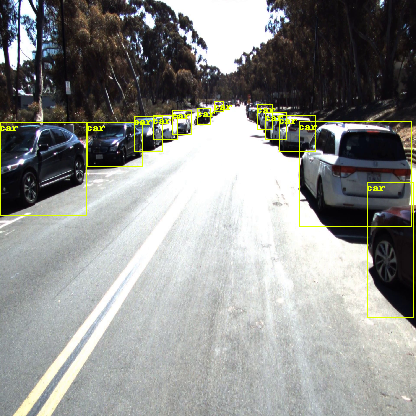

In [11]:
cfg_file = 'yolo3/cfg/yolov3.cfg'
weight_file = 'yolo3/yolov3.weights'
test_img_one = Image.open("DemoImages/camera6_4208.png").convert('RGB')

detect_one(cfg_file, weight_file, test_img_one)

### Faster R-CNN

### RetinaNet

### Cascade R-CNN

In [12]:
# Extract Frames of choice

frame_stream = cv2.VideoCapture("camera_6.mp4")
imgs = [2381, 4581, 3748, 3767, 3857, 4208]
for img in imgs:
    frame_stream.set(1, img)
    is_valid, frame = frame_stream.read()
    cv2.imwrite("camera6_"+str(img)+".png", frame)


### Vehicle Model Classification Tests

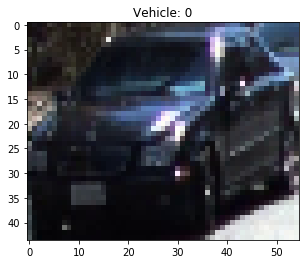

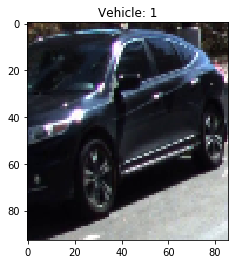

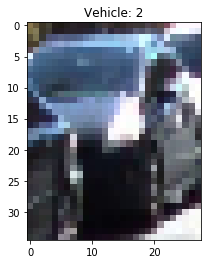

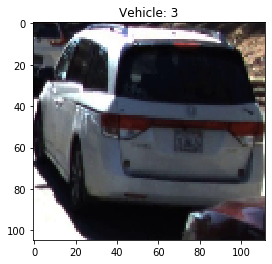

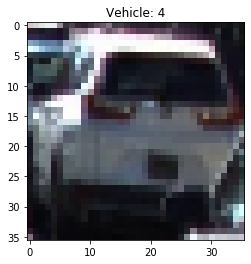

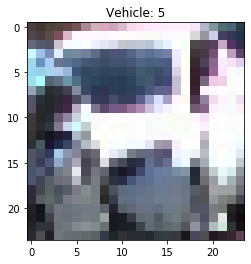

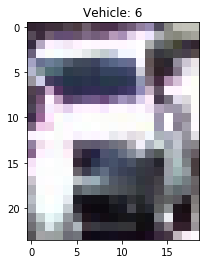

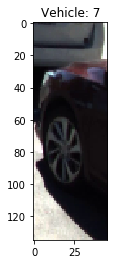

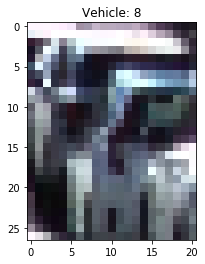

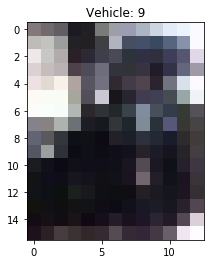

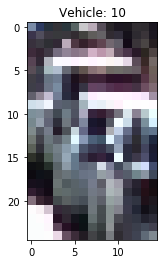

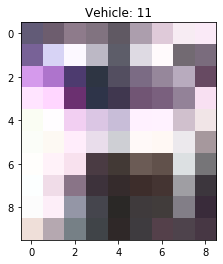

In [15]:
cfg_file = 'yolo3/cfg/yolov3.cfg'
weight_file = 'yolo3/yolov3.weights'
test_img_one = Image.open("DemoImages/camera6_4208.png").convert('RGB')

all_objs = classify_models(cfg_file, weight_file, test_img_one)
display_vehicles(all_objs)
